# 0. Autoencoder
- Using Simple Neural Network 

## 1. Settings

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Data

In [2]:
mnist_train = dset.MNIST("./data/MNIST", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dset.MNIST("./data/MNIST", train=False, transform=transforms.ToTensor(), download=True)

In [3]:
batch_size = 16
train_loader = torch.utils.data.DataLoader(mnist_train,batch_size=batch_size, shuffle=True,num_workers=2,drop_last=True)
test_loader = torch.utils.data.DataLoader(mnist_test,batch_size=batch_size, shuffle=False,num_workers=2,drop_last=True)

## 3. Define Model

In [4]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder,self).__init__()
        input_size = 28*28
        latent_size = 20
        output_size = 28*28
        
        self.encoder = nn.Linear(input_size,latent_size)
        self.decoder = nn.Linear(latent_size,input_size)
                
    def forward(self,x):
        batch_size = x.size(0)
        
        x = x.view(batch_size,-1)
        z = self.encoder(x)
        out = self.decoder(z).view(batch_size,1,28,28)
        return out, z
    
model = Autoencoder().cuda()

### 4. Loss func & Optimizer

In [5]:
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr= 0.0002)

## 5. Train 

In [6]:
num_epoch = 5
for i in range(num_epoch):
    for j, [image, label] in enumerate(train_loader):
        optimizer.zero_grad()

        x = Variable(image).cuda()
        output, _ = model.forward(x)
        loss = loss_func(output,x)
        
        loss.backward()
        optimizer.step()
        
    #if j % 1000 == 0:
    print("loss is", loss.cpu().data.numpy()[0])

loss is 0.0308447
loss is 0.0309282
loss is 0.027871
loss is 0.0269641
loss is 0.0241616


## 6. Check with Train Image

torch.Size([16, 28, 28])


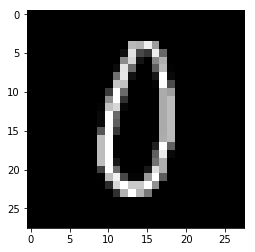

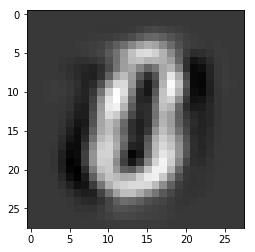

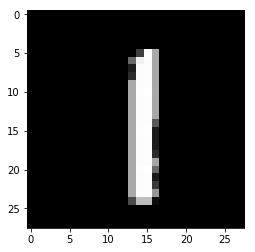

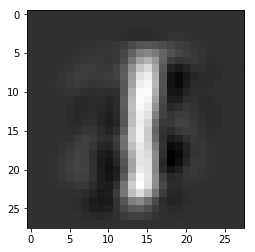

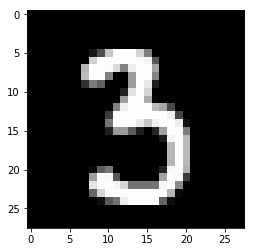

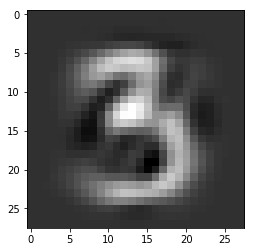

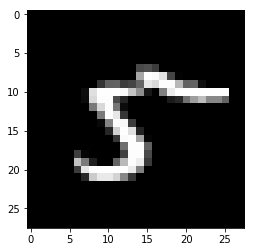

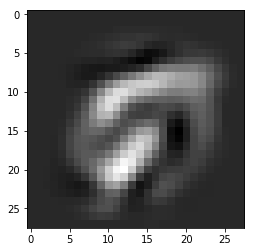

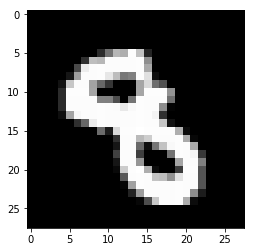

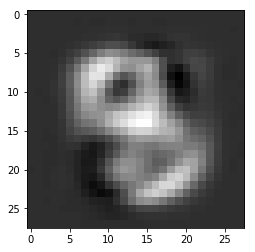

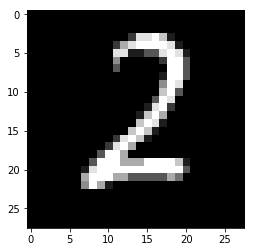

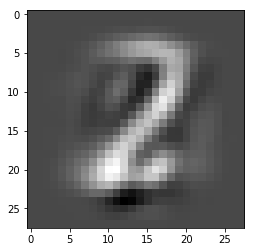

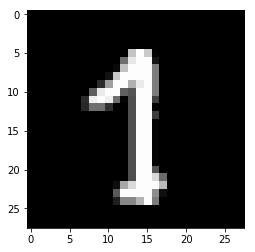

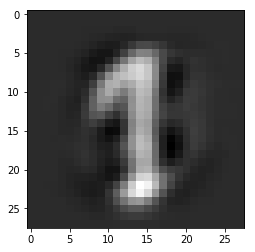

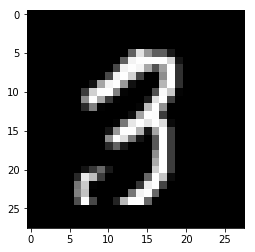

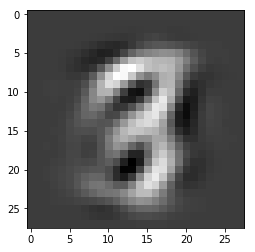

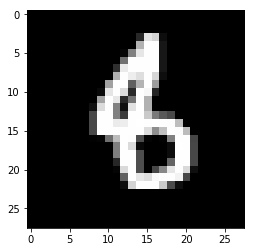

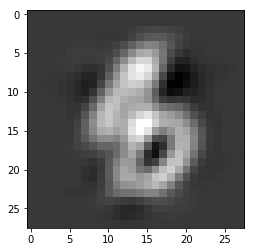

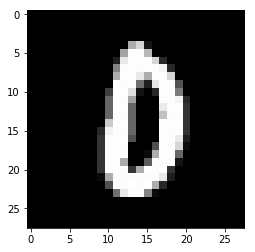

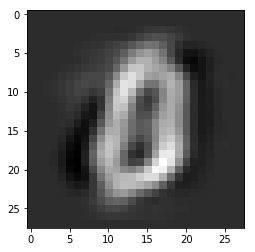

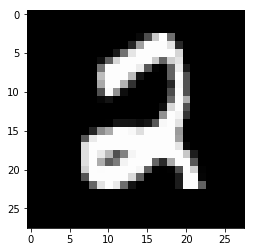

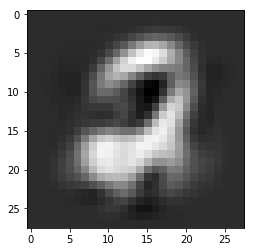

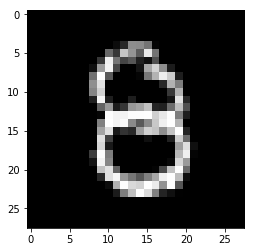

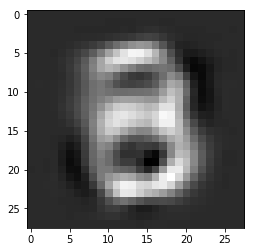

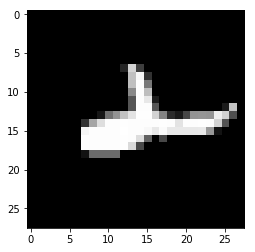

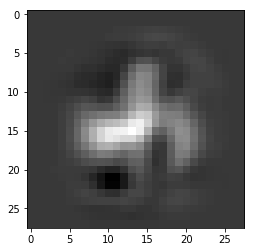

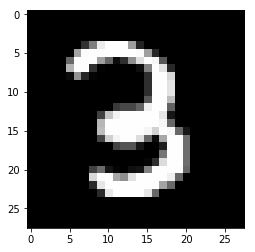

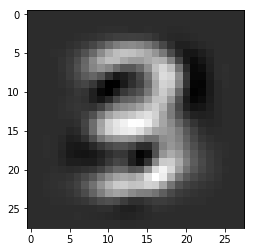

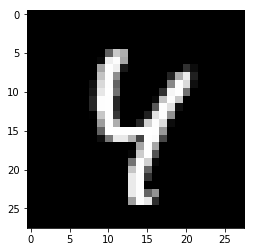

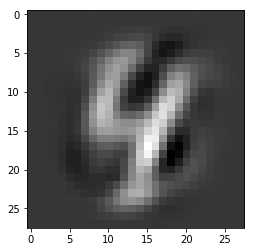

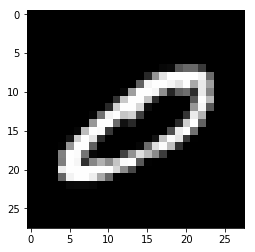

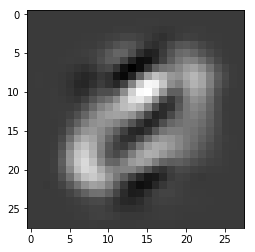

In [7]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(out_img.size()[0]):
    plt.imshow(torch.squeeze(image[i]).numpy(),cmap='gray')
    plt.show()
    plt.imshow(out_img[i].numpy(),cmap='gray')
    plt.show()

## 6. Check with Test Image

In [8]:
for i in range(1):
    for j,[image,label] in enumerate(test_loader):
        x = Variable(image).cuda()
        
        optimizer.zero_grad()
        output, _ = model.forward(x)
        loss = loss_func(output,x)
        loss.backward()
        optimizer.step()
        
    if j % 1000 == 0:
        print(loss)        

torch.Size([16, 28, 28])


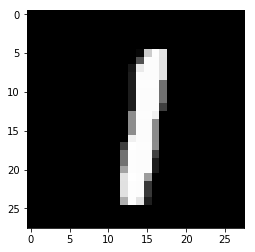

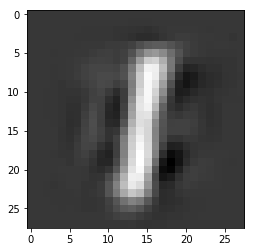

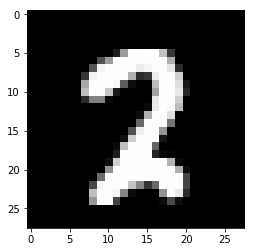

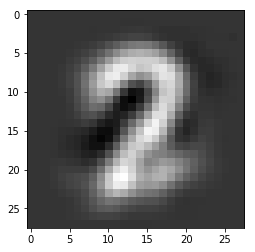

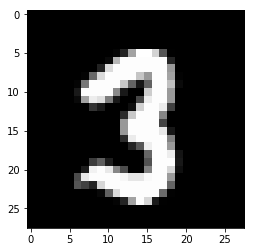

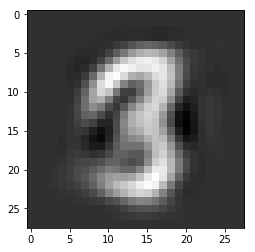

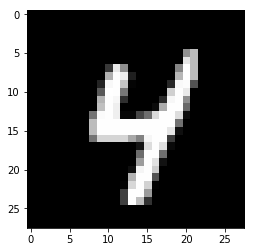

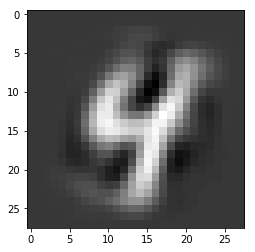

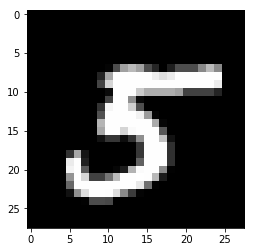

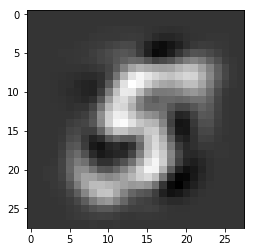

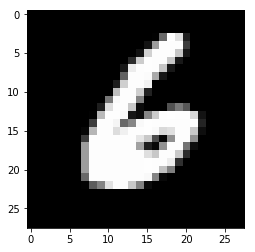

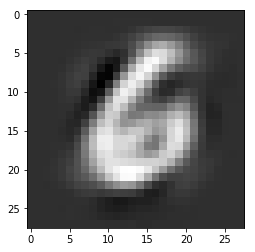

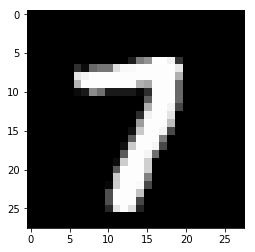

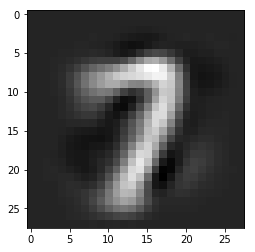

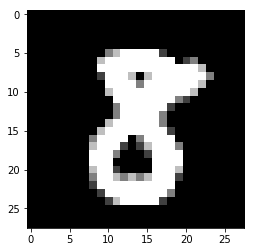

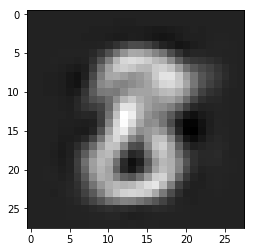

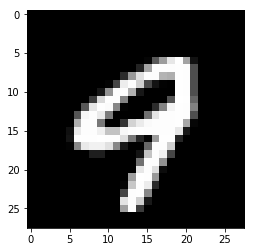

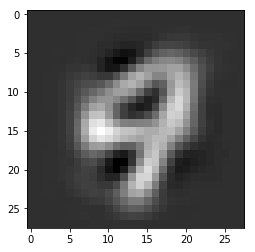

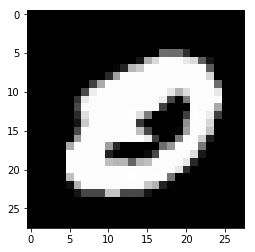

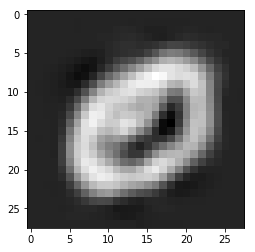

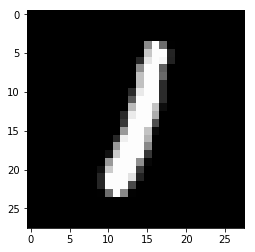

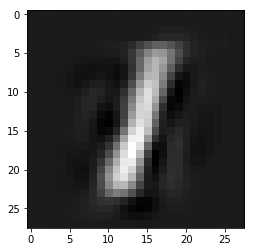

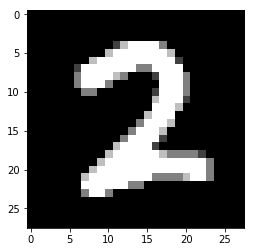

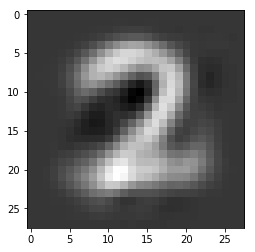

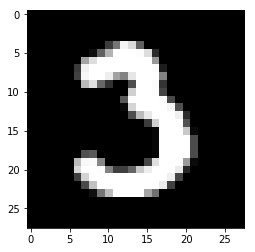

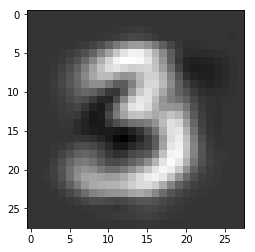

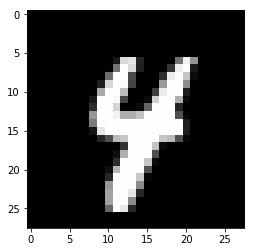

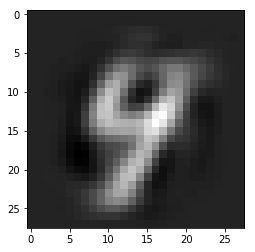

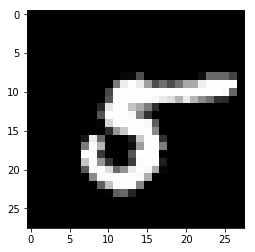

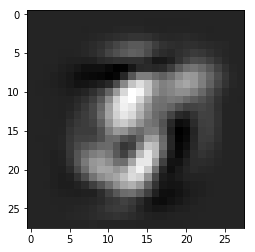

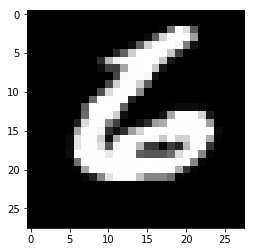

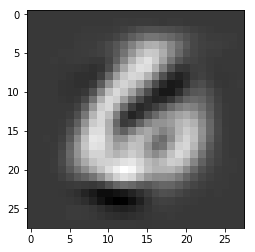

In [9]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(out_img.size()[0]):
    plt.imshow(torch.squeeze(image[i]).numpy(),cmap='gray')
    plt.show()
    plt.imshow(out_img[i].numpy(),cmap='gray')
    plt.show()